
## 참조자료

https://pinkwink.kr/1119

# 1. 타이타닉 데이터 읽어오기

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('dataset/titanic.csv', encoding='utf-8')

In [3]:
titanic.shape

(887, 8)

In [4]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## 성별을 숫자로 변환하기

In [5]:
titanic['Sex'] = titanic['Sex'].str.replace('female',"1")
titanic['Sex'] = titanic['Sex'].str.replace('male','0.')

In [6]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0.,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0.,35.0,0,0,8.0500


In [7]:
titanic['Sex'].value_counts()

0.    573
1     314
Name: Sex, dtype: int64

In [8]:
titanic['Sex'] = titanic['Sex'].astype('float')

In [9]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0.0,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1.0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1.0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1.0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0.0,35.0,0,0,8.0500


## 정수를 실수로 변환하기

In [10]:
titanic.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                        float64
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [11]:
titanic['Survived'] = titanic['Survived'].astype('float')
titanic['Pclass'] = titanic['Pclass'].astype('float')


In [12]:
titanic.dtypes

Survived                   float64
Pclass                     float64
Name                        object
Sex                        float64
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [13]:
titanic.values

array([[0.0, 3.0, 'Mr. Owen Harris Braund', ..., 1, 0, 7.25],
       [1.0, 1.0, 'Mrs. John Bradley (Florence Briggs Thayer) Cumings',
        ..., 1, 0, 71.2833],
       [1.0, 3.0, 'Miss. Laina Heikkinen', ..., 0, 0, 7.925],
       ...,
       [0.0, 3.0, 'Miss. Catherine Helen Johnston', ..., 1, 2, 23.45],
       [1.0, 1.0, 'Mr. Karl Howell Behr', ..., 0, 0, 30.0],
       [0.0, 3.0, 'Mr. Patrick Dooley', ..., 0, 0, 7.75]], dtype=object)

## 학습 및 테스트 데이터로 분리하기

In [14]:
x_data = titanic.values[:, [1,3,7]]
y_data = titanic.values[:, [0]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.1, random_state=7)

In [15]:
X_train.shape

(798, 3)

In [16]:
X_test.shape

(89, 3)

# 2. 모델 만들기

In [17]:
import keras

Using TensorFlow backend.


In [18]:
keras.__version__

'2.3.1'

In [19]:
import tensorflow as tf 

In [20]:
tf.keras.__version__

'2.2.4-tf'

In [21]:
from keras import  models
from keras import  layers

## 히든 1, 출력 1로 정의하기

In [43]:
model = models.Sequential()

In [44]:
model.add(layers.Dense(255, activation='relu', input_shape=(3,)))

In [45]:
model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 255)               1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 256       
Total params: 1,276
Trainable params: 1,276
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

## 학습하기

In [57]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

Train on 798 samples, validate on 89 samples
Epoch 1/500
798/798 [==============================] - 0s 22us/step - loss: 0.4516 - accuracy: 0.7945 - val_loss: 0.3754 - val_accuracy: 0.8315
Epoch 2/500
798/798 [==============================] - 0s 22us/step - loss: 0.4499 - accuracy: 0.7882 - val_loss: 0.3856 - val_accuracy: 0.8315
Epoch 3/500
798/798 [==============================] - 0s 21us/step - loss: 0.4637 - accuracy: 0.7932 - val_loss: 0.3792 - val_accuracy: 0.8315
Epoch 4/500
798/798 [==============================] - 0s 21us/step - loss: 0.4525 - accuracy: 0.7957 - val_loss: 0.3784 - val_accuracy: 0.8315
Epoch 5/500
798/798 [==============================] - 0s 21us/step - loss: 0.4443 - accuracy: 0.7945 - val_loss: 0.3789 - val_accuracy: 0.8315
Epoch 6/500
798/798 [==============================] - 0s 22us/step - loss: 0.4438 - accuracy: 0.7995 - val_loss: 0.3793 - val_accuracy: 0.8315
Epoch 7/500
798/798 [==============================] - 0s 23us/step - loss: 0.4506 - accura

798/798 [==============================] - 0s 21us/step - loss: 0.4540 - accuracy: 0.7845 - val_loss: 0.3813 - val_accuracy: 0.8090
Epoch 58/500
798/798 [==============================] - 0s 21us/step - loss: 0.4510 - accuracy: 0.7982 - val_loss: 0.3875 - val_accuracy: 0.8090
Epoch 59/500
798/798 [==============================] - 0s 22us/step - loss: 0.4454 - accuracy: 0.7982 - val_loss: 0.3796 - val_accuracy: 0.8315
Epoch 60/500
798/798 [==============================] - 0s 21us/step - loss: 0.4435 - accuracy: 0.8008 - val_loss: 0.3804 - val_accuracy: 0.8315
Epoch 61/500
798/798 [==============================] - 0s 22us/step - loss: 0.4470 - accuracy: 0.7982 - val_loss: 0.3828 - val_accuracy: 0.8315
Epoch 62/500
798/798 [==============================] - 0s 22us/step - loss: 0.4459 - accuracy: 0.7982 - val_loss: 0.4078 - val_accuracy: 0.8315
Epoch 63/500
798/798 [==============================] - 0s 21us/step - loss: 0.4417 - accuracy: 0.7995 - val_loss: 0.3760 - val_accuracy: 0.831

798/798 [==============================] - 0s 20us/step - loss: 0.4481 - accuracy: 0.7995 - val_loss: 0.3827 - val_accuracy: 0.8315
Epoch 114/500
798/798 [==============================] - 0s 20us/step - loss: 0.4477 - accuracy: 0.8020 - val_loss: 0.3862 - val_accuracy: 0.8090
Epoch 115/500
798/798 [==============================] - 0s 20us/step - loss: 0.4410 - accuracy: 0.8045 - val_loss: 0.3826 - val_accuracy: 0.8315
Epoch 116/500
798/798 [==============================] - 0s 21us/step - loss: 0.4491 - accuracy: 0.7957 - val_loss: 0.3844 - val_accuracy: 0.8315
Epoch 117/500
798/798 [==============================] - 0s 20us/step - loss: 0.4408 - accuracy: 0.7882 - val_loss: 0.3796 - val_accuracy: 0.8315
Epoch 118/500
798/798 [==============================] - 0s 21us/step - loss: 0.4420 - accuracy: 0.8045 - val_loss: 0.3788 - val_accuracy: 0.8315
Epoch 119/500
798/798 [==============================] - 0s 22us/step - loss: 0.4381 - accuracy: 0.8033 - val_loss: 0.3854 - val_accuracy:

798/798 [==============================] - 0s 21us/step - loss: 0.4397 - accuracy: 0.8020 - val_loss: 0.3786 - val_accuracy: 0.8315
Epoch 170/500
798/798 [==============================] - 0s 21us/step - loss: 0.4384 - accuracy: 0.8058 - val_loss: 0.3798 - val_accuracy: 0.8090
Epoch 171/500
798/798 [==============================] - 0s 20us/step - loss: 0.4410 - accuracy: 0.7945 - val_loss: 0.3804 - val_accuracy: 0.8315
Epoch 172/500
798/798 [==============================] - 0s 20us/step - loss: 0.4396 - accuracy: 0.7957 - val_loss: 0.3823 - val_accuracy: 0.8315
Epoch 173/500
798/798 [==============================] - 0s 20us/step - loss: 0.4431 - accuracy: 0.8033 - val_loss: 0.3797 - val_accuracy: 0.7978
Epoch 174/500
798/798 [==============================] - 0s 21us/step - loss: 0.4407 - accuracy: 0.8033 - val_loss: 0.3827 - val_accuracy: 0.8090
Epoch 175/500
798/798 [==============================] - 0s 21us/step - loss: 0.4499 - accuracy: 0.7957 - val_loss: 0.3817 - val_accuracy:

798/798 [==============================] - 0s 20us/step - loss: 0.4397 - accuracy: 0.8008 - val_loss: 0.3862 - val_accuracy: 0.8315
Epoch 226/500
798/798 [==============================] - 0s 20us/step - loss: 0.4415 - accuracy: 0.7995 - val_loss: 0.3799 - val_accuracy: 0.8202
Epoch 227/500
798/798 [==============================] - 0s 21us/step - loss: 0.4450 - accuracy: 0.7907 - val_loss: 0.3845 - val_accuracy: 0.8090
Epoch 228/500
798/798 [==============================] - 0s 21us/step - loss: 0.4361 - accuracy: 0.8020 - val_loss: 0.3776 - val_accuracy: 0.8315
Epoch 229/500
798/798 [==============================] - 0s 22us/step - loss: 0.4378 - accuracy: 0.8020 - val_loss: 0.3881 - val_accuracy: 0.8090
Epoch 230/500
798/798 [==============================] - 0s 21us/step - loss: 0.4438 - accuracy: 0.7970 - val_loss: 0.3803 - val_accuracy: 0.8315
Epoch 231/500
798/798 [==============================] - 0s 20us/step - loss: 0.4454 - accuracy: 0.7982 - val_loss: 0.3766 - val_accuracy:

798/798 [==============================] - 0s 20us/step - loss: 0.4497 - accuracy: 0.8008 - val_loss: 0.3801 - val_accuracy: 0.8315
Epoch 282/500
798/798 [==============================] - 0s 21us/step - loss: 0.4382 - accuracy: 0.8045 - val_loss: 0.3844 - val_accuracy: 0.8202
Epoch 283/500
798/798 [==============================] - 0s 20us/step - loss: 0.4373 - accuracy: 0.8058 - val_loss: 0.3838 - val_accuracy: 0.8315
Epoch 284/500
798/798 [==============================] - 0s 20us/step - loss: 0.4408 - accuracy: 0.8033 - val_loss: 0.3905 - val_accuracy: 0.8090
Epoch 285/500
798/798 [==============================] - 0s 20us/step - loss: 0.4410 - accuracy: 0.8095 - val_loss: 0.3813 - val_accuracy: 0.8315
Epoch 286/500
798/798 [==============================] - 0s 21us/step - loss: 0.4399 - accuracy: 0.8045 - val_loss: 0.3831 - val_accuracy: 0.8090
Epoch 287/500
798/798 [==============================] - 0s 20us/step - loss: 0.4403 - accuracy: 0.8058 - val_loss: 0.3812 - val_accuracy:

798/798 [==============================] - 0s 21us/step - loss: 0.4422 - accuracy: 0.7982 - val_loss: 0.3842 - val_accuracy: 0.8202
Epoch 338/500
798/798 [==============================] - 0s 21us/step - loss: 0.4388 - accuracy: 0.8033 - val_loss: 0.3876 - val_accuracy: 0.8315
Epoch 339/500
798/798 [==============================] - 0s 22us/step - loss: 0.4400 - accuracy: 0.8020 - val_loss: 0.3801 - val_accuracy: 0.8315
Epoch 340/500
798/798 [==============================] - 0s 20us/step - loss: 0.4386 - accuracy: 0.8058 - val_loss: 0.3847 - val_accuracy: 0.8090
Epoch 341/500
798/798 [==============================] - 0s 21us/step - loss: 0.4392 - accuracy: 0.8033 - val_loss: 0.3838 - val_accuracy: 0.8315
Epoch 342/500
798/798 [==============================] - 0s 21us/step - loss: 0.4394 - accuracy: 0.8058 - val_loss: 0.3931 - val_accuracy: 0.8090
Epoch 343/500
798/798 [==============================] - 0s 20us/step - loss: 0.4408 - accuracy: 0.8033 - val_loss: 0.3855 - val_accuracy:

798/798 [==============================] - 0s 21us/step - loss: 0.4389 - accuracy: 0.7982 - val_loss: 0.3803 - val_accuracy: 0.8315
Epoch 394/500
798/798 [==============================] - 0s 20us/step - loss: 0.4425 - accuracy: 0.7970 - val_loss: 0.3865 - val_accuracy: 0.8315
Epoch 395/500
798/798 [==============================] - 0s 21us/step - loss: 0.4465 - accuracy: 0.7982 - val_loss: 0.3859 - val_accuracy: 0.8202
Epoch 396/500
798/798 [==============================] - 0s 21us/step - loss: 0.4378 - accuracy: 0.8058 - val_loss: 0.3808 - val_accuracy: 0.8315
Epoch 397/500
798/798 [==============================] - 0s 20us/step - loss: 0.4369 - accuracy: 0.8083 - val_loss: 0.3882 - val_accuracy: 0.8090
Epoch 398/500
798/798 [==============================] - 0s 21us/step - loss: 0.4394 - accuracy: 0.7945 - val_loss: 0.3819 - val_accuracy: 0.8090
Epoch 399/500
798/798 [==============================] - 0s 19us/step - loss: 0.4351 - accuracy: 0.8058 - val_loss: 0.3825 - val_accuracy:

798/798 [==============================] - 0s 20us/step - loss: 0.4382 - accuracy: 0.8008 - val_loss: 0.3819 - val_accuracy: 0.8202
Epoch 450/500
798/798 [==============================] - 0s 20us/step - loss: 0.4369 - accuracy: 0.7982 - val_loss: 0.3926 - val_accuracy: 0.8202
Epoch 451/500
798/798 [==============================] - 0s 20us/step - loss: 0.4391 - accuracy: 0.8033 - val_loss: 0.3842 - val_accuracy: 0.8090
Epoch 452/500
798/798 [==============================] - 0s 20us/step - loss: 0.4421 - accuracy: 0.7957 - val_loss: 0.3791 - val_accuracy: 0.8315
Epoch 453/500
798/798 [==============================] - 0s 21us/step - loss: 0.4370 - accuracy: 0.8033 - val_loss: 0.3859 - val_accuracy: 0.8090
Epoch 454/500
798/798 [==============================] - 0s 20us/step - loss: 0.4360 - accuracy: 0.8158 - val_loss: 0.3880 - val_accuracy: 0.8090
Epoch 455/500
798/798 [==============================] - 0s 21us/step - loss: 0.4397 - accuracy: 0.7945 - val_loss: 0.3856 - val_accuracy:

## 학습 데이터 결과 그래프 그리기

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

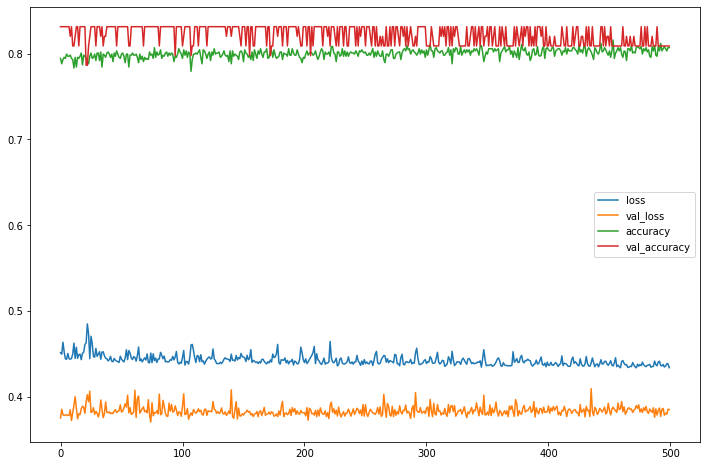

In [60]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.show()

## 평가하기

In [61]:
model.evaluate(X_test, y_test)

89/89 [==============================] - 0s 22us/step


[0.38526119743840076, 0.8089887499809265]

In [62]:
a = model.predict(X_test)

In [63]:
import numpy as np

In [64]:
np.max(a, axis=1)

array([0.8843589 , 0.12750205, 0.13596952, 0.124064  , 0.45630023,
       0.09990776, 0.8876054 , 0.23086613, 0.86516917, 0.10449538,
       0.86516917, 0.12677848, 0.35670093, 0.95905626, 0.18991593,
       0.9611912 , 0.10449538, 0.22397014, 0.86090475, 0.10449538,
       0.38438618, 0.3668656 , 0.37885094, 0.1998412 , 0.6066297 ,
       0.14155197, 0.38440126, 0.04821983, 0.0964399 , 0.6066297 ,
       0.35587603, 0.3850899 , 0.12878042, 0.96528965, 0.0534316 ,
       0.12253132, 0.94047266, 0.08883333, 0.43534246, 0.9775243 ,
       0.98262364, 0.0964399 , 0.07686102, 0.00824475, 0.08197719,
       0.0957357 , 0.5011652 , 0.3694353 , 0.07297152, 0.6066297 ,
       0.1815575 , 0.3491406 , 0.13596952, 0.8931148 , 0.21540979,
       0.01512852, 0.08413813, 0.9809983 , 0.09702921, 0.38500595,
       0.3719443 , 0.0957357 , 0.38296723, 0.86444426, 0.9916821 ,
       0.19050118, 0.35255545, 0.35654145, 0.5923688 , 0.2574553 ,
       0.44539   , 0.09990776, 0.9809983 , 0.19918945, 0.86508

In [65]:
X_test[1]

array([3.0, 0.0, 29.125], dtype=object)

In [66]:
y_test[1]

array([0.0], dtype=object)

In [67]:
a[1]

array([0.12750205], dtype=float32)

## 임의의 결과를 넣고 예측하기

In [68]:
dicaprio = np.array([3., 0., 5.]).reshape(1,3)
winslet = np.array([1., 1., 100.]).reshape(1,3)

In [69]:
model.predict(dicaprio)

array([[0.02844785]], dtype=float32)

In [70]:
model.predict(winslet)

array([[0.96952224]], dtype=float32)